In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt # Okt는 원래 이름이 Twitter였으나 0.5.0 버전 이후부터 이름이 Okt 바뀌었다.

In [4]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:748)>

In [7]:
train_data = pd.read_table('ratings.txt')


KeyError: 1

In [12]:
train_data[:5]
print(len(train_data))

200000


In [15]:
print(train_data.isnull().values.any()) # NULL 값 존재 유무
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

False
False
199992


In [17]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")   

In [18]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [19]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


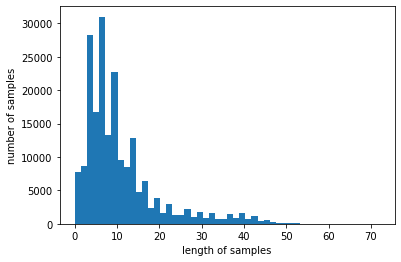

In [20]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [22]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [30]:
print(model.wv.most_similar("ㅋ"))

[('ㅋㅋ', 0.8476306796073914), ('ㅋㅋㅋ', 0.8383706212043762), ('ㅋㅋㅋㅋ', 0.7482583522796631), ('ㅋㅋㅋㅋㅋ', 0.6718535423278809), ('넹', 0.6534041166305542), ('닼', 0.6312487721443176), ('ㅋㅋㅋㅋㅋㅋ', 0.6295187473297119), ('ㅎㅎㅎ', 0.6183102130889893), ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 0.6154668927192688), ('ㅋㅋㅋㅋㅋㅋㅋ', 0.6151555776596069)]


In [41]:
print(model.wv.most_similar("명치"))

[('후려', 0.8110605478286743), ('허당', 0.7668205499649048), ('갈겨', 0.7561343908309937), ('싸대기', 0.754085898399353), ('문도', 0.7433620691299438), ('국보', 0.741065502166748), ('선리기연', 0.7400757670402527), ('쌩', 0.7383593320846558), ('아가리', 0.7375746965408325), ('해드리다', 0.7353463172912598)]


In [50]:
import numpy as np
np.save('naver_movie_embed.npy', model.wv.vectors)

In [86]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [91]:
model.

TypeError: 'dict_keys' object does not support indexing

[('레닌', 1.0),
 ('종로', 0.9297083616256714),
 ('버블', 0.9292107224464417),
 ('헬리콥터', 0.9253368973731995),
 ('맥베스', 0.9249923825263977),
 ('에헴', 0.9239503145217896),
 ('관음증', 0.9231371879577637),
 ('대하드라마', 0.9217795133590698),
 ('전력', 0.9212514758110046),
 ('화인', 0.9208534955978394)]